#### Visualizing Grid Topology with Data Overlay.

From Michael Duda:
https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/
ortho_cells.ncl


Ming Ge Feb 2025

In [2]:
import uxarray as ux
import cartopy.crs as ccrs 

In [3]:
dir_data = "/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/"

flnm_grid = dir_data + "SouthAmerica.init.nc"
flnm_data = dir_data + "diag.2014-09-11_00.00.00.nc"

uxds_mpas = ux.open_dataset(flnm_grid, flnm_data)

uxgrid = uxds_mpas.uxgrid 

# for wind_speed_level1_max
uxda = uxds_mpas.wind_speed_level1_max.isel(Time=0)

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude wind_speed_level1_max)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Path.I      :Path   [Longitude,Latitude]
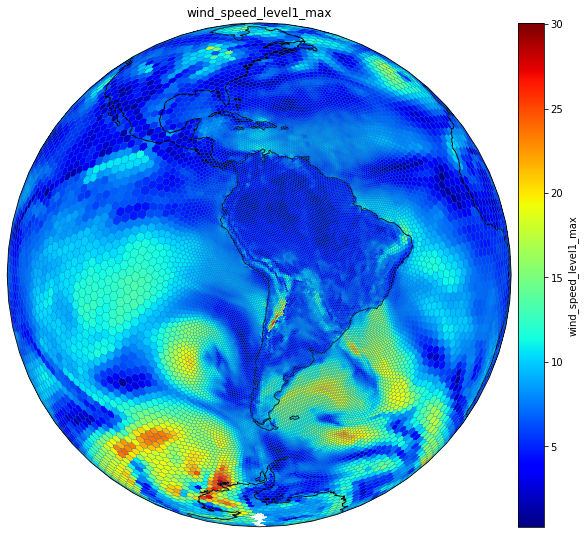

In [8]:
proj = ccrs.Orthographic(central_latitude=-17.5, central_longitude=-72.5)

plot_1 = uxgrid.plot.edges(projection=proj, 
                  height=500,
                  width=750,
                  linewidth = .2,
                  color="black", 
                  title="Grid Edge Plot")

plot_2 = uxda.plot(projection=proj, 
                   rasterize=True, 
                   backend='matplotlib', 
                   pixel_ratio=4.0, 
                   features=['coastline'], 
                   width=750, height=500, 
                   cmap='jet', 
                   title="wind_speed_level1_max")

overlayed_plot = plot_2 * plot_1
overlayed_plot

#### For Comparison: plot from original NCL

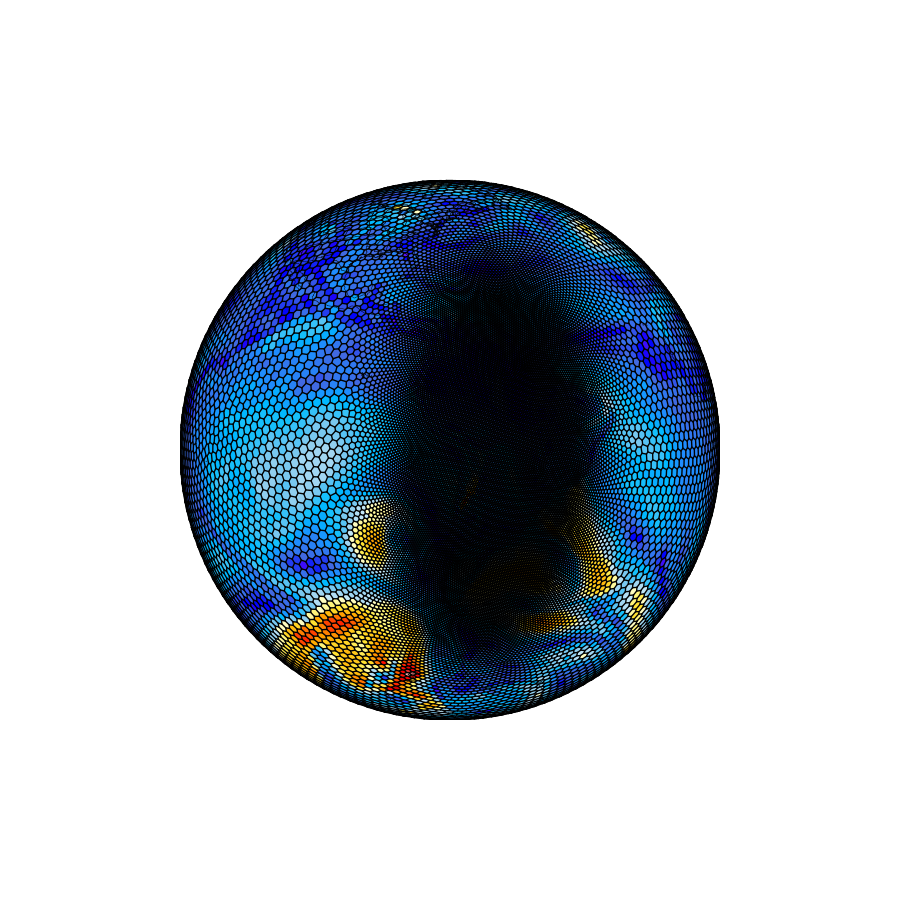

In [11]:
from IPython.display import Image
Image(filename=('/glade/u/home/mingge/NCL_2_PYTHON/fig6.png'))